# Parkinsos Disease Detection with multiple classification algorithm

Small dataset for Parkinson detection <br>
In this notebook I will implement different classification algorithm to detect Parkinson disease<br>
<br>
**Algorithms**:<br>
- XGBoost
<br>
- Random Forrest
<br>
- KNN

In [169]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [170]:
df  = pd.read_csv('parkinsons.data')

In [171]:
print(df.shape)
df.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [172]:
features=df.loc[:,df.columns!='status'].values[:,1:]

labels=df.loc[:,'status'].values

print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [173]:
scaler=MinMaxScaler((-1,1))

x=scaler.fit_transform(features)

y=labels

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)


In [174]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(156, 22)
(156,)
(39, 22)
(39,)


## XGBoost

In [175]:
model=XGBClassifier(eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\Mate\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [176]:
y_pred=model.predict(x_test)
xgboostacc=accuracy_score(y_test, y_pred)*100
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [177]:
from sklearn.metrics import confusion_matrix

XGboost= pd.DataFrame(

    confusion_matrix(y_test, y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)

<AxesSubplot:>

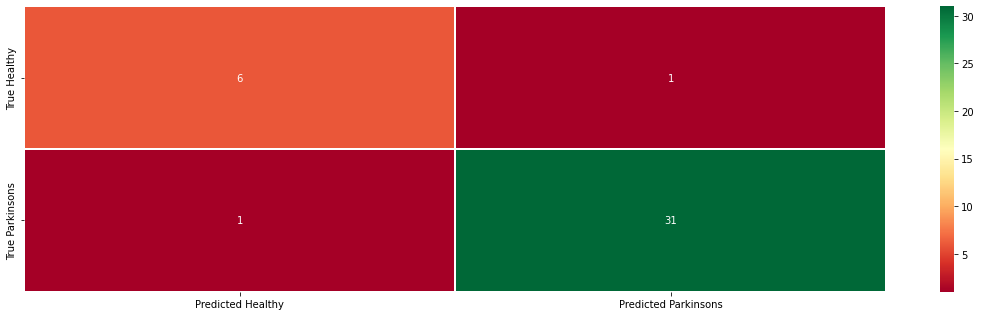

In [178]:
import seaborn as sns

sns.heatmap(XGboost, cmap ='RdYlGn', linewidths = 0.30, annot = True)

## Random forrest

In [179]:
X = df.drop('status', axis=1)


X = X.drop('name', axis=1)

y = df['status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [180]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)

In [181]:
random_forest.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)

randomforrestacc=accuracy_score(y_test, y_predict)*100
randomforrestacc

93.87755102040816

In [182]:
randomforrest= pd.DataFrame(

confusion_matrix(y_test, y_predict),

columns=['Predicted Healthy', 'Predicted Parkinsons'],

index=['True Healthy', 'True Parkinsons']

)

<AxesSubplot:>

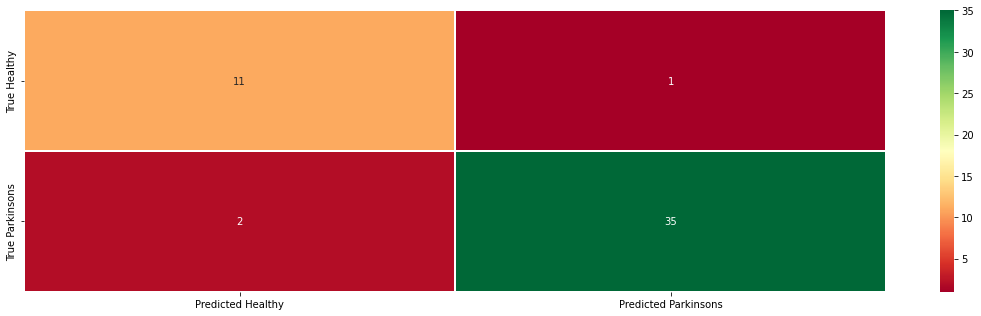

In [183]:
import seaborn as sns


sns.heatmap(randomforrest, cmap ='RdYlGn', linewidths = 0.30, annot = True)

## KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score

In [185]:
scaler=MinMaxScaler((-1,1))

x=scaler.fit_transform(features)

y=labels

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [186]:
pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
variance = pca.explained_variance_ratio_

classifi = KNeighborsClassifier(n_neighbors = 8,p=2,metric ='minkowski')

classifi.fit(x_train,y_train)

y_pred = classifi.predict(x_test)

 #KNN model

cm=confusion_matrix(y_test,y_pred)

knnacc=accuracy_score(y_test,y_pred)*100
knnacc

89.74358974358975

In [187]:
KNN=pd.DataFrame(

    confusion_matrix(y_test, y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)

<AxesSubplot:>

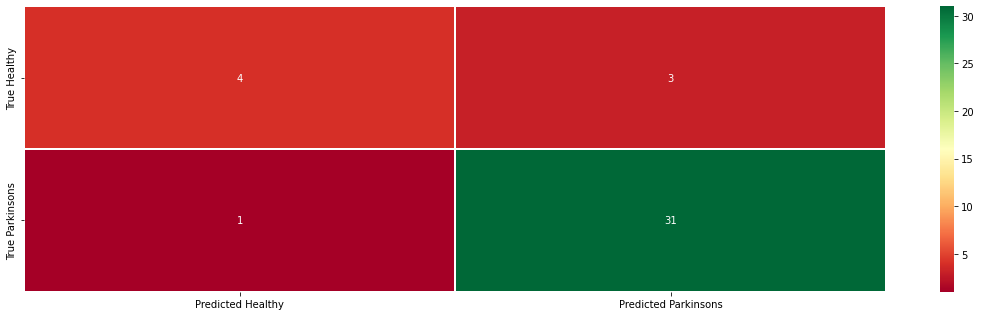

In [188]:
sns.heatmap(KNN, cmap ='RdYlGn', linewidths = 0.30, annot = True)

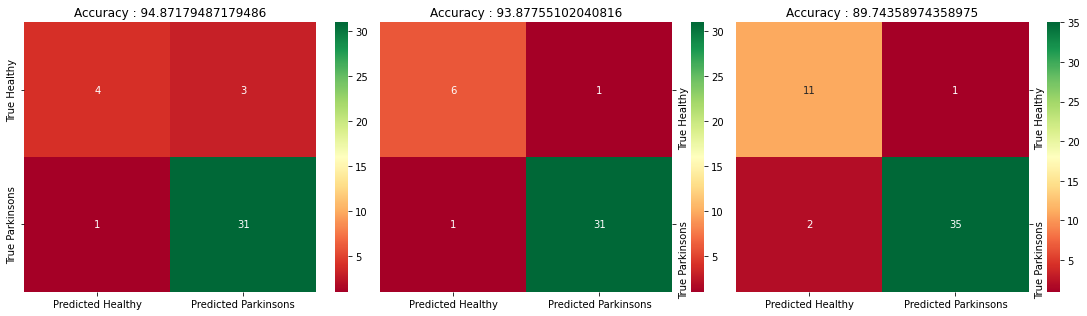

In [192]:
plt.rcParams["figure.figsize"] = [15.50, 4.50]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(KNN, cmap="RdYlGn", ax=ax1, cbar=True,annot = True)
sns.heatmap(XGboost, cmap="RdYlGn", ax=ax2, cbar=True,annot = True)
sns.heatmap(randomforrest, cmap="RdYlGn", ax=ax3,annot = True)
ax2.yaxis.tick_right()
ax3.yaxis.tick_right()
ax2.set_title( "Accuracy : "+str(randomforrestacc))
ax1.set_title( "Accuracy : "+str(xgboostacc))
ax3.set_title( "Accuracy : "+str(knnacc))
fig.subplots_adjust(wspace=0.001)
plt.show()

# Summary:

 For this Parkinson disease data found out that XGBoost is the best Algorithm to predict the onset of the disease